In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm


In [2]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def loss(x):
    return himmelblau(x[0], x[1])

# Base ES

In [3]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
for e in range(episodes-1):
    n = np.random.normal(scale=0.5, size=(gens, 2))
    for i in range(gens-1):
        x = x_p + n[i, :]
        x_loss = loss(x)
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x

    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))

    x_p = curr_best_x

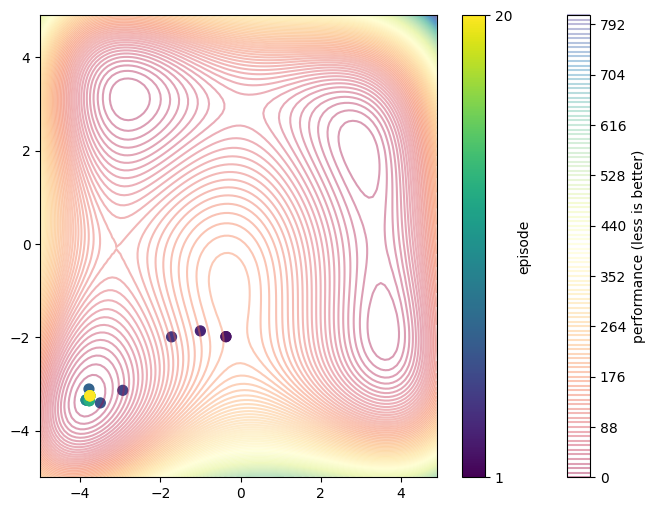

In [4]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()

# Grad ES

In [5]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
current_xs = [0] * gens
for e in range(episodes-1):
    N = np.random.normal(scale=0.5, size=(gens, 2))
    offspring_losses = np.zeros((gens, len(x)))
    for i in range(gens-1):
        x = x_p + N[i, :]
        x_loss = loss(x)
        # now that we're using this gradient technique, we won't actually use the most fit x other than
        # for gauging performance
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x
        current_xs[i] = x
        offspring_losses[i] = x_loss

    # mean of offspring Xs' performance
    mu_loss = np.mean(offspring_losses)
    std_loss = np.std(offspring_losses)
    # normalize losses
    A = mu_loss
    if std_loss != 0:
        A = (offspring_losses - mu_loss) / std_loss
    
    # weight losses by distance from parent,
    # grad = (A * N) / gens
    grad = np.mean(A * N, axis=-2)
    print('grad', grad)


    # x_p = curr_best_x
    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))
    # grad points up so we want the inverse of it
    x_p = x - grad

grad [-0.27577093 -0.17289401]
grad [-0.36479219 -0.04401132]
grad [-0.18138913 -0.20123226]
grad [-0.19856121  0.14106879]
grad [-0.33425278 -0.05662552]
grad [0.02901631 0.11063592]
grad [ 0.0926065  -0.23621472]
grad [-0.23938362  0.08283304]
grad [0.48570864 0.06864554]
grad [-0.17882    -0.13540062]
grad [-0.12112849  0.19764001]
grad [0.05702005 0.32982184]
grad [ 0.19394779 -0.15771321]
grad [-0.38614969 -0.1918682 ]
grad [-0.25643857  0.02451616]
grad [-0.08657453  0.08828952]
grad [ 0.29135623 -0.05377461]
grad [ 0.2951609  -0.08109148]
grad [-0.06608786 -0.25765075]


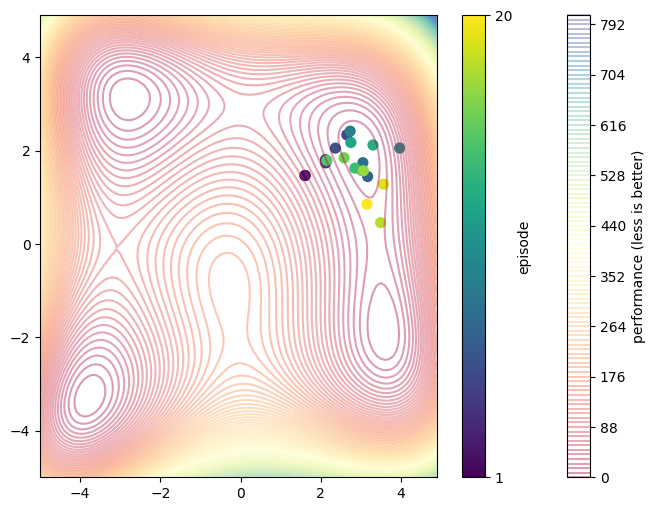

In [6]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()